In [1]:
import numpy as np
import pickle  # 用 pickle 替代 cPickle
import gym
np.bool8 = np.bool_

In [2]:
import gym

In [3]:
env = gym.make("Pong-v4")
observation, _ = env.reset()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [4]:
def show_img(observation):
    import numpy as np
    import matplotlib.pyplot as plt

    # 创建一个随机的 (210, 160, 3) 矩阵
    image = observation
    # image = prepro_1(observation)

    # 使用 matplotlib 显示图像
    plt.imshow(image)
    # plt.axis('off')  # 隐藏坐标轴
    plt.show()

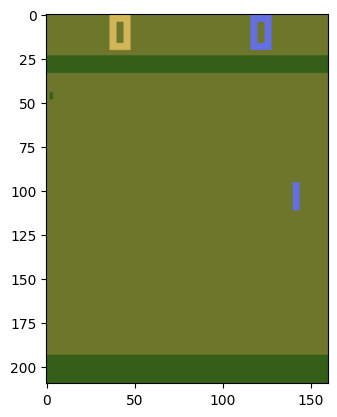

In [5]:
show_img(observation)

In [6]:
def prepro(I):
    """将 210x160x3 uint8 帧预处理为 6400 (80x80) 1D float 向量"""
    I = I[35:195]  # 裁剪
    I = I[::2, ::2, 0]  # 下采样因子为 2
    I[I == 144] = 0  # 删除背景类型 1
    I[I == 109] = 0  # 删除背景类型 2
    I[I != 0] = 1  # 其他设置为 1
    return I.astype(np.float32).ravel()

In [7]:
D = 6400
H = 200

In [8]:
model = {'W1':np.random.randn(H,D),'W2':np.random.randn(H)}

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [10]:
def policy_forward(x):
    ## x D 
    h = model['W1'] @ x # H
    h[h<0] = 0
    p = model['W2'] @ h
    p = sigmoid(p)
    return h,p

In [29]:
def policy_backward(xs,logps,hs):
    dW2 = logps @ hs
    h = np.outer(model['W2'],logps)
    h[hs.T<=0] = 0
    dW1 = h @ xs
    return {'W1':dW1,'W2':dW2}

In [37]:
def discount_rewards(rewards):
    ans = np.zeros_like(rewards)
    adding = 0
    for t in reversed(range(len(rewards))):
        if rewards[t] != 0:
            adding = 0
        adding = adding * 0.99 + rewards[t]
        ans[t] = adding
    return ans

In [45]:
model = {'W1':np.random.randn(H,D),'W2':np.random.randn(H)}
model['W1'] = np.random.randn(H, D) / np.sqrt(D)  # "Xavier" 初始化
model['W2'] = np.random.randn(H) / np.sqrt(H)

In [46]:
observation, _ = env.reset()
prev_x = None
xs = []
logps = []
hs = []
rewards = []
train_time = 0
total_sum = 0
while True:
    current_x = prepro(observation)
    gap = np.zeros_like(current_x) if prev_x is None else current_x - prev_x
    h,p = policy_forward(gap)
    action = 2 if p < np.random.uniform() else 3
    y = 0 if action == 2 else 1
    observation, reward, terminated, truncated, info = env.step(action)  # 更新为新的返回值
    prev_x = current_x
    rewards.append(reward)
    logps.append(y-p)
    hs.append(h)
    xs.append(gap)
    total_sum += reward
    
    if terminated or truncated:
        xs = np.vstack(xs)
        rewards = np.vstack(rewards).ravel()
        logps = np.vstack(logps).ravel()
        hs = np.vstack(hs)
        rewards = discount_rewards(rewards)
        rewards -= rewards.mean()
        rewards /= rewards.std()
        logps *= rewards
#         print(xs.shape,logps.shape,model['W2'].shape,hs.shape)
        grad = policy_backward(xs,logps,hs)
        for k,v in grad.items():
            model[k] += 0.001 * grad[k]
        
        print('total',total_sum)
        
        xs = []
        rewards = []
        logps = []
        hs = []
        prev_x = None
        total_sum = 0
        observation, _ = env.reset()
        
        

total -21.0
total -21.0
total -21.0
total -20.0
total -21.0
total -20.0
total -21.0
total -21.0
total -20.0
total -20.0
total -20.0
total -21.0
total -20.0
total -21.0
total -21.0
total -19.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -21.0
total -19.0
total -21.0
total -19.0
total -21.0
total -21.0
total -21.0
total -20.0
total -20.0
total -20.0
total -20.0
total -20.0
total -20.0
total -21.0
total -19.0
total -20.0
total -21.0
total -20.0
total -21.0
total -21.0
total -20.0
total -21.0
total -21.0
total -20.0
total -20.0
total -21.0
total -21.0
total -20.0
total -19.0
total -21.0
total -21.0
total -20.0
total -19.0
total -20.0
total -19.0
total -21.0
total -21.0
total -19.0
total -20.0
total -21.0
total -20.0
total -21.0
total -21.0
total -20.0
total -21.0
total -20.0
total -20.0
total -20.0
total -20.0
total -21.0
total -17.0
total -21.0
total -19.0
total -20.0
total -20.0
total -19.0
total -20.0
tota

total -17.0
total -19.0
total -19.0
total -21.0
total -20.0
total -20.0
total -18.0
total -21.0
total -19.0
total -20.0
total -19.0
total -19.0
total -18.0
total -20.0
total -17.0
total -20.0
total -20.0
total -19.0
total -14.0
total -19.0
total -19.0
total -20.0
total -20.0
total -19.0
total -15.0
total -20.0
total -16.0
total -17.0
total -18.0
total -20.0
total -18.0
total -20.0
total -17.0
total -18.0
total -15.0
total -16.0
total -16.0
total -19.0
total -20.0
total -20.0
total -14.0
total -20.0
total -20.0
total -19.0
total -20.0
total -18.0
total -17.0
total -17.0
total -17.0
total -13.0
total -19.0
total -19.0
total -21.0
total -17.0
total -17.0
total -16.0
total -21.0
total -16.0
total -19.0
total -16.0
total -21.0
total -17.0
total -19.0
total -21.0
total -20.0
total -18.0
total -17.0
total -15.0
total -17.0
total -20.0
total -14.0
total -17.0
total -18.0
total -18.0
total -20.0
total -17.0
total -19.0
total -20.0
total -20.0
total -16.0
total -19.0
total -15.0
total -20.0
tota

total -9.0
total -8.0
total -15.0
total -13.0
total -8.0
total -5.0
total -8.0
total -11.0
total -13.0
total -6.0
total -5.0
total -6.0
total -8.0
total -12.0
total -13.0
total -8.0
total -9.0
total -14.0
total -11.0
total -3.0
total -11.0
total -11.0
total -5.0
total -7.0
total -8.0
total -16.0
total -8.0
total -7.0
total -12.0
total -4.0
total -16.0
total -14.0
total -9.0
total -14.0
total -10.0
total -9.0
total -14.0
total -8.0
total -14.0
total -13.0
total -10.0
total -5.0
total -12.0
total -13.0
total -7.0
total -11.0
total -14.0
total -11.0
total -9.0
total -15.0
total -11.0
total -11.0
total -11.0
total -10.0
total -13.0
total -12.0
total -14.0
total -15.0
total -12.0
total -12.0
total -12.0
total -18.0
total -11.0
total -16.0
total -10.0
total -14.0
total -9.0
total -9.0
total -15.0
total -8.0
total -16.0
total -10.0
total -10.0
total -3.0
total -19.0
total -15.0
total -12.0
total -11.0
total -5.0
total -14.0
total -10.0
total -3.0
total -12.0
total -10.0
total -7.0
total -10.0

total -10.0
total -12.0
total -8.0
total -10.0
total -17.0
total -9.0
total -9.0
total -10.0
total -7.0
total -14.0
total -7.0
total -11.0
total -6.0
total -10.0
total -13.0
total -5.0
total -7.0
total -5.0
total -13.0
total -11.0
total -18.0
total -4.0
total -15.0
total -15.0
total -16.0
total -6.0
total -8.0
total -6.0
total -9.0
total -10.0
total -13.0
total -6.0
total -1.0
total -14.0
total -6.0
total -5.0
total -13.0
total -16.0
total -13.0
total -6.0
total -11.0
total -13.0
total -6.0
total -6.0
total -7.0
total -6.0
total -7.0
total -1.0
total -15.0
total -9.0
total -14.0
total -11.0
total -12.0
total -9.0
total -14.0
total -12.0
total -2.0
total -13.0
total -13.0
total -2.0
total -10.0
total -13.0
total -8.0
total -8.0
total -2.0
total -17.0
total -12.0
total -7.0
total -15.0
total -9.0
total -10.0
total -6.0
total -15.0
total -8.0
total -17.0
total -4.0
total -4.0
total -11.0
total -8.0
total -8.0
total -5.0
total -15.0
total -14.0
total -15.0
total -12.0
total -13.0
total -7.

total -14.0
total -9.0
total -12.0
total -13.0
total -4.0
total -12.0
total -11.0
total -3.0
total -15.0
total -7.0
total -14.0
total -9.0
total -7.0
total -6.0
total 2.0
total -8.0
total 3.0
total -16.0
total -11.0
total -3.0
total -5.0
total -13.0
total 1.0
total -7.0
total -15.0
total -2.0
total -13.0
total 4.0
total -14.0
total 4.0
total -9.0
total -3.0
total -7.0
total -8.0
total -9.0
total 6.0
total -9.0
total -13.0
total -8.0
total 1.0
total -5.0
total -5.0
total -7.0
total -14.0
total -2.0
total -9.0
total -10.0
total -13.0
total -4.0
total -8.0
total 5.0
total -7.0
total -10.0
total -8.0
total -6.0
total -8.0
total -13.0
total 9.0
total -7.0
total -9.0
total -9.0
total -14.0
total 2.0
total -3.0
total -9.0
total -17.0
total -4.0
total -4.0
total 2.0
total -14.0
total -5.0
total -8.0
total 2.0
total -11.0
total -1.0
total 1.0
total -10.0
total -11.0
total -11.0
total -12.0
total -14.0
total -14.0
total -5.0
total -11.0
total -5.0
total -15.0
total -6.0
total -17.0
total -11.0
t

total -15.0
total -7.0
total -10.0
total -13.0
total -1.0
total -12.0
total 5.0
total -15.0
total -6.0
total -7.0
total -10.0
total 3.0
total -1.0
total -9.0
total -12.0
total 7.0
total -11.0
total -11.0
total 1.0
total -12.0
total -6.0
total -14.0
total -2.0
total -12.0
total -8.0
total -15.0
total -10.0
total -5.0
total -19.0
total -12.0
total -12.0
total -5.0
total -10.0
total -6.0
total -6.0
total 2.0
total -5.0
total -11.0
total -6.0
total -9.0
total -6.0
total 5.0
total -8.0
total -3.0
total -9.0
total -14.0
total -12.0
total 2.0
total -3.0
total -8.0
total -6.0
total -13.0
total -4.0
total -12.0
total 3.0
total -9.0
total -8.0
total -4.0
total -3.0
total -9.0
total -17.0
total -11.0
total -2.0
total -9.0
total -13.0
total -14.0
total -11.0
total -12.0
total -13.0
total -7.0
total -15.0
total -14.0
total 5.0
total -13.0
total -9.0
total -8.0
total -2.0
total -11.0
total -11.0
total -12.0
total -10.0
total -3.0
total -13.0
total -9.0
total -7.0
total -14.0
total -4.0
total -2.0
to

total -7.0
total -15.0
total -8.0
total -8.0
total -9.0
total -15.0
total -9.0
total -15.0
total -16.0
total -9.0
total -13.0
total -13.0
total -1.0
total -7.0
total -16.0
total -15.0
total -13.0
total -12.0
total -15.0
total -8.0
total -17.0
total -9.0
total -17.0
total -16.0
total 4.0
total -17.0
total -11.0
total -11.0
total -15.0
total -8.0
total -12.0
total -15.0
total -9.0
total -15.0
total -7.0
total -14.0
total -15.0
total -7.0
total -13.0
total -12.0
total -13.0
total -12.0
total -13.0
total -14.0
total -6.0
total -9.0
total -9.0
total -10.0
total -11.0
total -11.0
total -9.0
total -11.0
total -11.0
total -15.0
total -13.0
total -6.0
total -10.0
total -5.0
total -15.0
total -13.0
total -7.0
total -14.0
total -15.0
total -9.0
total -15.0
total -5.0
total -2.0
total -10.0
total -16.0
total -10.0
total -8.0
total -9.0
total -11.0
total -17.0
total -14.0
total -11.0
total -16.0
total -16.0
total -6.0
total -12.0
total 8.0
total -13.0
total -11.0
total -13.0
total -2.0
total -12.0


total -5.0
total -1.0
total -3.0
total -2.0
total -4.0
total 6.0
total -7.0
total -13.0
total -4.0
total 8.0
total -5.0
total -2.0
total -19.0
total -8.0
total -13.0
total -10.0
total -12.0
total -6.0
total -10.0
total -4.0
total -5.0
total -17.0
total 3.0
total -16.0
total -6.0
total -1.0
total -4.0
total 8.0
total -10.0
total -6.0
total -11.0
total -5.0
total -8.0
total -4.0
total 4.0
total -13.0
total -17.0
total 2.0
total -9.0
total -10.0
total -9.0
total -6.0
total -3.0
total -10.0
total -5.0
total -5.0
total -8.0
total 4.0
total -5.0
total -7.0
total -8.0
total -9.0
total -8.0
total -1.0
total -16.0
total -4.0
total -11.0
total 2.0
total -3.0
total -6.0
total 5.0
total -9.0
total -9.0
total -5.0
total -8.0
total -11.0
total -9.0
total -1.0
total -13.0
total -8.0
total -13.0
total -4.0
total -6.0
total -2.0
total -18.0
total -2.0
total -1.0
total -10.0
total -14.0
total -8.0
total -11.0
total -5.0
total -16.0
total -2.0
total -5.0
total 6.0
total -15.0
total 3.0
total -15.0
total 

total -9.0
total -3.0
total -3.0
total -3.0
total -10.0
total -11.0
total -2.0
total 2.0
total -10.0
total 1.0
total -11.0
total -7.0
total -7.0
total -13.0
total -11.0
total -13.0
total -4.0
total 4.0
total -7.0
total -5.0
total -3.0
total -11.0
total -4.0
total -10.0
total -18.0
total -10.0
total -7.0
total -9.0
total -4.0
total -3.0
total -8.0
total -6.0
total -5.0
total -2.0
total -7.0
total -1.0
total -10.0
total -11.0
total -4.0
total 5.0
total -2.0
total 3.0
total -2.0
total -7.0
total -5.0
total -12.0
total -5.0
total -8.0
total -5.0
total 1.0
total 2.0
total -10.0
total -1.0
total -11.0
total 2.0
total -1.0
total -7.0
total 6.0
total 2.0
total -2.0
total -1.0
total 7.0
total -2.0
total -9.0
total 1.0
total -1.0
total -6.0
total -9.0
total -2.0
total -4.0
total 3.0
total 3.0
total 9.0
total 6.0
total -5.0
total -1.0
total -1.0
total -12.0
total 3.0
total -4.0
total -5.0
total 3.0
total -4.0
total -10.0
total -3.0
total -12.0
total -11.0
total -12.0
total -7.0
total -10.0
total 

total -15.0
total -4.0
total -8.0
total -3.0
total -4.0
total -9.0
total -5.0
total -8.0
total -1.0
total 3.0
total -5.0
total -4.0
total -10.0
total 4.0
total -9.0
total 5.0
total -1.0
total -15.0
total -9.0
total -1.0
total -5.0
total -13.0
total -10.0
total -12.0
total -9.0
total -6.0
total -5.0
total -9.0
total -14.0
total -13.0
total -3.0
total 4.0
total -8.0
total -8.0
total -7.0
total -9.0
total -13.0
total -12.0
total -5.0
total -10.0
total -4.0
total -13.0
total -11.0
total -11.0
total -13.0
total -7.0
total -11.0
total 5.0
total 3.0
total 1.0
total -3.0
total -11.0
total -1.0
total -7.0
total -6.0
total -10.0
total -2.0
total 1.0
total -6.0
total -9.0
total -11.0
total -17.0
total -7.0
total 1.0
total -16.0
total -12.0
total -15.0
total -3.0
total -9.0
total 5.0
total -13.0
total -15.0
total -12.0
total -10.0
total -17.0
total -13.0
total 3.0
total -6.0
total -4.0
total -9.0
total 9.0
total -15.0
total 14.0
total -5.0
total 3.0
total -10.0
total -9.0
total -1.0
total -12.0
to

total 2.0
total -1.0
total -2.0
total -6.0
total 1.0
total -5.0
total 5.0
total -3.0
total 4.0
total -5.0
total 3.0
total 9.0
total -7.0
total -7.0
total 5.0
total 3.0
total -10.0
total -10.0
total 6.0
total 2.0
total 3.0
total 2.0
total -7.0
total -2.0
total -8.0
total 5.0
total -4.0
total -1.0
total -4.0
total 7.0
total -10.0
total -6.0
total 6.0
total 9.0
total -13.0
total 3.0
total 7.0
total 7.0
total -11.0
total -5.0
total 6.0
total -11.0
total -10.0
total 3.0
total -7.0
total -10.0
total 1.0
total -3.0
total -1.0
total -6.0
total 3.0
total -8.0
total -3.0
total 4.0
total -3.0
total -2.0
total -7.0
total -7.0
total -3.0
total -5.0
total -7.0
total -3.0
total -2.0
total 5.0
total -4.0
total 1.0
total 7.0
total -11.0
total -11.0
total 9.0
total 5.0
total 3.0
total -1.0
total 11.0
total 6.0
total 7.0
total -1.0
total -2.0
total -2.0
total -3.0
total -5.0
total -9.0
total -3.0
total 6.0
total -4.0
total -3.0
total 4.0
total -8.0
total -9.0
total 8.0
total -5.0
total 4.0
total 5.0
tota

total 3.0
total -7.0
total 2.0
total 3.0
total -7.0
total -11.0
total -9.0
total -8.0
total -1.0
total -11.0
total 11.0
total -11.0
total -5.0
total -4.0
total 4.0
total -1.0
total -6.0
total -15.0
total -4.0
total -12.0
total -10.0
total -10.0
total -5.0
total -1.0
total -3.0
total -12.0
total -20.0
total -3.0
total -10.0
total -4.0
total -13.0
total -9.0
total 1.0
total 3.0
total -9.0
total 3.0
total -3.0
total -5.0
total -8.0
total -7.0
total 5.0
total -11.0
total -12.0
total -3.0
total -15.0
total -3.0
total -7.0
total -9.0
total -10.0
total -9.0
total 5.0
total -1.0
total 7.0
total -6.0
total -14.0
total 12.0
total 6.0
total 5.0
total -8.0
total 2.0
total 6.0
total 2.0
total -13.0
total 8.0
total 7.0
total 5.0
total -9.0
total -7.0
total -4.0
total -5.0
total -13.0
total -2.0
total 4.0
total -5.0
total -6.0
total -8.0
total 5.0
total -11.0
total -10.0
total 3.0
total -7.0
total -7.0
total -1.0
total -3.0
total 3.0
total -3.0
total -5.0
total -11.0
total -1.0
total -10.0
total -14.

total -14.0
total -9.0
total -5.0
total -3.0
total -6.0
total -14.0
total 2.0
total -1.0
total 2.0
total -4.0
total 3.0
total -6.0
total 13.0
total 13.0
total -1.0
total 1.0
total -3.0
total -3.0
total 7.0
total -4.0
total -3.0
total 4.0
total 12.0
total -13.0
total -4.0
total 2.0
total -5.0
total -9.0
total -4.0
total -2.0
total -12.0
total 2.0
total 2.0
total -5.0
total 2.0
total 4.0
total -9.0
total -5.0
total -5.0
total -5.0
total -7.0
total -11.0
total -9.0
total 4.0
total -11.0
total -1.0
total 8.0
total -12.0
total -7.0
total -3.0
total -7.0
total -11.0
total -11.0
total -14.0
total -9.0
total -5.0
total -7.0
total -9.0
total 4.0
total -6.0
total -4.0
total 9.0
total 9.0
total 3.0
total -8.0
total 3.0
total 1.0
total 3.0
total -4.0
total 4.0
total -8.0
total 2.0
total -3.0
total 5.0
total -7.0
total 9.0
total -8.0
total 6.0
total -10.0
total -9.0
total -7.0
total -4.0
total 4.0
total -5.0
total -12.0
total -9.0
total 4.0
total -7.0
total 6.0
total 7.0
total -3.0
total -3.0
total

total -7.0
total -2.0
total -9.0
total 10.0
total 17.0
total -11.0
total 7.0
total 5.0
total 9.0
total -4.0
total 10.0
total 8.0
total 6.0
total -11.0
total -3.0
total 1.0
total -7.0
total 12.0
total -8.0
total 5.0
total -5.0
total -6.0
total 11.0
total -2.0
total 2.0
total 4.0
total -5.0
total -8.0
total -3.0
total 5.0
total -5.0
total -5.0
total -11.0
total 3.0
total -11.0
total -5.0
total -11.0
total 1.0
total -9.0
total -1.0
total -2.0
total 1.0
total -5.0
total 8.0
total 4.0
total -2.0
total 8.0
total 2.0
total 7.0
total 1.0
total 10.0
total -5.0
total 9.0
total -3.0
total -7.0
total -5.0
total -5.0
total -6.0
total -5.0
total -6.0
total 5.0
total -11.0
total 7.0
total -3.0
total -5.0
total -5.0
total 5.0
total 2.0
total 1.0
total 6.0
total 3.0
total -5.0
total -3.0
total -9.0
total 5.0
total 5.0
total -3.0
total -8.0
total -4.0
total -9.0
total 9.0
total -11.0
total 4.0
total 5.0
total 4.0
total -4.0
total 3.0
total -14.0
total -7.0
total 4.0
total -10.0
total -1.0
total 6.0
tota

total -13.0
total -4.0
total -9.0
total -7.0
total -3.0
total -4.0
total 3.0
total -1.0
total -6.0
total -8.0
total -1.0
total 7.0
total -9.0
total -4.0
total -1.0
total -14.0
total 2.0
total -3.0
total -5.0
total -1.0
total -9.0
total -5.0
total -11.0
total 3.0
total -3.0
total -2.0
total -4.0
total -3.0
total -15.0
total -5.0
total -7.0
total -3.0
total -1.0
total 3.0
total -9.0
total -15.0
total 10.0
total 1.0
total -5.0
total -7.0
total -9.0
total -12.0
total 8.0
total -14.0
total -10.0
total -13.0
total -5.0
total -7.0
total 2.0
total -13.0
total -12.0
total -9.0
total -5.0
total 6.0
total -9.0
total -11.0
total -12.0
total -9.0
total -8.0
total -1.0
total 3.0
total -3.0
total 6.0
total -3.0
total -11.0
total -13.0
total -5.0
total -9.0
total -1.0
total -3.0
total -13.0
total -7.0
total -11.0
total -5.0
total -1.0
total -2.0
total -5.0
total -11.0
total 4.0
total 3.0
total -5.0
total -7.0
total -5.0
total -8.0
total -8.0
total -6.0
total -9.0
total 4.0
total -2.0
total -6.0
total 

total 1.0
total 2.0
total 14.0
total 3.0
total -8.0
total -9.0
total -9.0
total 12.0
total 3.0
total 9.0
total 4.0
total 5.0
total -11.0
total 3.0
total 6.0
total -4.0
total -15.0
total 5.0
total -7.0
total 4.0
total 6.0
total -1.0
total -7.0
total -3.0
total 7.0
total -6.0
total -11.0
total -5.0
total 6.0
total -6.0
total 3.0
total -8.0
total 5.0
total -2.0
total 3.0
total -12.0
total -9.0
total -9.0
total 7.0
total 4.0
total -9.0
total -10.0
total 2.0
total -3.0
total 11.0
total 3.0
total 4.0
total -10.0
total -8.0
total 1.0
total -3.0
total 2.0
total -8.0
total 2.0
total -5.0
total 4.0
total -9.0
total 4.0
total 1.0
total 13.0
total 3.0
total -10.0
total -5.0
total -9.0
total -8.0
total 4.0
total -9.0
total 4.0
total 4.0
total -14.0
total -3.0
total 1.0
total -11.0
total -5.0
total -9.0
total -3.0
total -1.0
total 5.0
total -9.0
total 3.0
total 1.0
total -9.0
total -4.0
total -9.0
total -5.0
total -9.0
total -1.0
total -10.0
total 4.0
total -2.0
total -3.0
total 1.0
total 3.0
total 

total -11.0
total -7.0
total -11.0
total -7.0
total -11.0
total -3.0
total -6.0
total -11.0
total -2.0
total -7.0
total -9.0
total -3.0
total 1.0
total -7.0
total 2.0
total -11.0
total -7.0
total -3.0
total 5.0
total -2.0
total -9.0
total -5.0
total -1.0
total -8.0
total -8.0
total -11.0
total -3.0
total -15.0
total -5.0
total -4.0
total -3.0
total -1.0
total 4.0
total -9.0
total 1.0
total 4.0
total 2.0
total -4.0
total 9.0
total -9.0
total 1.0
total 9.0
total 3.0
total -2.0
total -13.0
total -8.0
total -10.0
total -5.0
total -4.0
total -6.0
total -6.0
total -9.0
total -15.0
total -6.0
total -3.0
total -7.0
total -3.0
total 5.0
total 6.0
total -7.0
total -10.0
total -2.0
total -1.0
total -3.0
total 2.0
total 2.0
total -3.0
total -3.0
total -10.0
total -1.0
total -5.0
total -7.0
total -9.0
total -3.0
total -15.0
total -5.0
total 4.0
total 1.0
total -9.0
total 8.0
total 5.0
total -13.0
total -11.0
total -4.0
total -2.0
total 4.0
total 3.0
total 2.0
total -7.0
total -9.0
total -9.0
total 

total 7.0
total -7.0
total 4.0
total -16.0
total -3.0
total -4.0
total 5.0
total 5.0
total -7.0
total -3.0
total -3.0
total -3.0
total 2.0
total -7.0
total -10.0
total -4.0
total -3.0
total 6.0
total -8.0
total 4.0
total 1.0
total -6.0
total -15.0
total -11.0
total 11.0
total 4.0
total -4.0
total 2.0
total -10.0
total 4.0
total -6.0
total 3.0
total 3.0
total -7.0
total -1.0
total -10.0
total 4.0
total 14.0
total -2.0
total -8.0
total 5.0
total 3.0
total 3.0
total -8.0
total 6.0
total 9.0
total 4.0
total -7.0
total -1.0
total -7.0
total -6.0
total 6.0
total 4.0
total -7.0
total -1.0
total -8.0
total -5.0
total -4.0
total 8.0
total 6.0
total -5.0
total 7.0
total -9.0
total 4.0
total -1.0
total -9.0
total 5.0
total 2.0
total 6.0
total 2.0
total 10.0
total -1.0
total 7.0
total -11.0
total -2.0
total -1.0
total 3.0
total 6.0
total -11.0
total -11.0
total -7.0
total 10.0
total -5.0
total 1.0
total 7.0
total -3.0
total -3.0
total 5.0
total -5.0
total 4.0
total 4.0
total -1.0
total 3.0
total -

total -2.0
total 8.0
total 6.0
total 3.0
total -3.0
total -1.0
total -6.0
total 9.0
total 3.0
total -5.0
total 10.0
total -13.0
total 15.0
total 7.0
total 3.0
total -11.0
total -8.0
total -15.0
total 7.0
total 1.0
total -11.0
total 1.0
total 12.0
total 6.0
total 6.0
total 5.0
total 14.0
total -8.0
total -9.0
total -5.0
total 7.0
total -5.0
total 12.0
total 2.0
total 1.0
total 1.0
total 1.0
total -5.0
total 6.0
total -12.0
total 1.0
total -7.0
total -7.0
total 5.0
total 1.0
total -10.0
total -1.0
total 3.0
total -2.0
total 1.0
total -6.0
total -9.0
total 5.0
total 3.0
total -2.0
total -1.0
total -3.0
total -5.0
total -3.0
total -9.0
total 1.0
total 3.0
total -7.0
total 5.0
total -2.0
total 6.0
total 6.0
total -10.0
total 4.0
total -1.0
total 4.0
total -5.0
total 3.0
total 4.0
total 1.0
total 8.0
total -8.0
total 2.0
total -3.0
total -2.0
total -7.0
total -1.0
total -6.0
total -6.0
total -5.0
total -1.0
total -7.0
total -1.0
total -8.0
total -3.0
total -3.0
total 13.0
total 6.0
total -8.

total -9.0
total 10.0
total -5.0
total 1.0
total -1.0
total -7.0
total -5.0
total 2.0
total -1.0
total 2.0
total -5.0
total 4.0
total -5.0
total -2.0
total 2.0
total 1.0
total 9.0
total -1.0
total 3.0
total -4.0
total -3.0
total 4.0
total 10.0
total -2.0
total -12.0
total -12.0
total -2.0
total -3.0
total 5.0
total 11.0
total 3.0
total -10.0
total 3.0
total -9.0
total -1.0
total 6.0
total -3.0
total 9.0
total -10.0
total -8.0
total -3.0
total 5.0
total -2.0
total -8.0
total 7.0
total 12.0
total 5.0
total 6.0
total -7.0
total -12.0
total -4.0
total -13.0
total 14.0
total -11.0
total -7.0
total -5.0
total -13.0
total 4.0
total 3.0
total 1.0
total -6.0
total -2.0
total -7.0
total 1.0
total -4.0
total 8.0
total -2.0
total -9.0
total -4.0
total -13.0
total 3.0
total 8.0
total -8.0
total -7.0
total 2.0
total -4.0
total -1.0
total -7.0
total 4.0
total -9.0
total -1.0
total 9.0
total 5.0
total -3.0
total -3.0
total 6.0
total 8.0
total -7.0
total 10.0
total 2.0
total -7.0
total -5.0
total 4.0
t

total 9.0
total -10.0
total -8.0
total -1.0
total 3.0
total 14.0
total -1.0
total -8.0
total -9.0
total -9.0
total -5.0
total -10.0
total -5.0
total -7.0
total -7.0
total -3.0
total 7.0
total -4.0
total -4.0
total -3.0
total -3.0
total -4.0
total -4.0
total -13.0
total 3.0
total -4.0
total -1.0
total 3.0
total 3.0
total 5.0
total 11.0
total -2.0
total -5.0
total -3.0
total -2.0
total -6.0
total -11.0
total 5.0
total -13.0
total -8.0
total 10.0
total 8.0
total 3.0
total -3.0
total 6.0
total -9.0
total -5.0
total 6.0
total -2.0
total -4.0
total 8.0
total -11.0
total -8.0
total -6.0
total -11.0
total 4.0
total 4.0
total -4.0
total -9.0
total -7.0
total -3.0
total -11.0
total -8.0
total -5.0
total -10.0
total -8.0
total 3.0
total -5.0
total -11.0
total 1.0
total -8.0
total -17.0
total 3.0
total 14.0
total 2.0
total 3.0
total -4.0
total 3.0
total 6.0
total -11.0
total -2.0
total 1.0
total 2.0
total -13.0
total -11.0
total -10.0
total -1.0
total -7.0
total -1.0
total -7.0
total -5.0
total 1.

total 4.0
total -3.0
total 4.0
total 3.0
total 6.0
total 3.0
total -10.0
total 11.0
total -7.0
total -14.0
total 7.0
total 7.0
total 8.0
total 3.0
total -1.0
total -8.0
total 1.0
total -2.0
total 14.0
total 2.0
total 6.0
total 12.0
total -9.0
total 3.0
total -5.0
total -6.0
total 15.0
total 4.0
total 2.0
total 1.0
total -4.0
total -7.0
total 4.0
total 5.0
total -1.0
total -4.0
total -8.0
total -12.0
total -10.0
total -9.0
total -3.0
total 6.0
total -3.0
total 10.0
total -9.0
total -5.0
total 3.0
total 4.0
total 7.0
total 4.0
total -4.0
total 4.0
total -3.0
total 5.0
total 3.0
total -6.0
total 1.0
total 3.0
total -3.0
total 6.0
total 5.0
total -6.0
total -5.0
total -5.0
total 1.0
total 8.0
total -8.0
total -8.0
total -2.0
total -1.0
total 7.0
total 3.0
total -4.0
total -3.0
total 2.0
total 1.0
total 10.0
total 10.0
total -3.0
total 3.0
total -3.0
total -4.0
total -1.0
total 1.0
total 7.0
total -1.0
total 2.0
total 11.0
total -3.0
total -4.0
total 4.0
total 4.0
total 5.0
total -1.0
total

total 12.0
total -7.0
total -3.0
total -8.0
total 1.0
total 3.0
total 8.0
total -7.0
total -1.0
total 2.0
total -6.0
total 4.0
total 5.0
total -7.0
total -5.0
total 8.0
total -2.0
total 13.0
total -13.0
total 4.0
total 4.0
total 7.0
total -11.0
total -3.0
total 9.0
total 2.0
total 4.0
total 2.0
total 1.0
total 7.0
total -1.0
total -1.0
total -8.0
total 4.0
total -3.0
total -9.0
total 2.0
total 5.0
total -3.0
total 1.0
total 5.0
total 8.0
total -1.0
total 4.0
total 8.0
total -4.0
total 4.0
total -6.0
total -1.0
total 1.0
total 4.0
total -9.0
total 8.0
total -7.0
total -5.0
total 7.0
total 1.0
total 2.0
total -12.0
total 4.0
total -2.0
total 2.0
total 1.0
total 9.0
total 14.0
total -10.0
total -9.0
total 7.0
total -5.0
total -7.0
total 7.0
total 3.0
total -1.0
total -6.0
total -6.0
total 7.0
total -14.0
total -5.0
total -8.0
total -3.0
total 5.0
total -6.0
total -6.0
total -5.0
total 1.0
total 2.0
total 9.0
total 10.0
total 11.0
total 2.0
total 3.0
total -1.0
total -6.0
total -10.0
total

total 10.0
total 2.0
total 14.0
total 4.0
total -3.0
total 3.0
total 10.0
total 2.0
total -6.0
total -2.0
total 7.0
total 2.0
total -11.0
total 9.0
total 4.0
total 13.0
total 7.0
total 5.0
total 6.0
total -5.0
total 6.0
total 2.0
total -1.0
total -5.0
total 6.0
total -8.0
total 2.0
total -11.0
total -1.0
total -7.0
total -1.0
total -8.0
total -2.0
total 2.0
total -4.0
total -3.0
total -9.0
total -6.0
total -1.0
total -10.0
total 2.0
total -9.0
total 5.0
total 5.0
total -7.0
total 5.0
total 3.0
total -4.0
total 2.0
total -6.0
total -6.0
total -9.0
total 6.0
total 1.0
total 8.0
total -1.0
total 14.0
total 4.0
total 4.0
total -5.0
total 2.0
total 11.0
total -6.0
total -4.0
total -3.0
total -5.0
total 3.0
total 1.0
total -4.0
total -1.0
total 2.0
total 2.0
total 6.0
total 3.0
total -2.0
total 2.0
total 6.0
total 1.0
total 1.0
total 3.0
total 2.0
total -5.0
total -1.0
total 4.0
total 3.0
total -6.0
total -10.0
total 8.0
total -13.0
total 11.0
total 8.0
total 1.0
total -9.0
total -3.0
total 

total 3.0
total 6.0
total 8.0
total 16.0
total 5.0
total -10.0
total -1.0
total -8.0
total -5.0
total -1.0
total 2.0
total -11.0
total 8.0
total 15.0
total 11.0
total -1.0
total -5.0
total -5.0
total 4.0
total 3.0
total 13.0
total 13.0
total 5.0
total 12.0
total -3.0
total 9.0
total -1.0
total 5.0
total 4.0
total 9.0
total -6.0
total 7.0
total -1.0
total 11.0
total 5.0
total 11.0
total 9.0
total -5.0
total 2.0
total 8.0
total 1.0
total 7.0
total 15.0
total 17.0
total 6.0
total 1.0
total 8.0
total 2.0
total -2.0
total 13.0
total 3.0
total -1.0
total 7.0
total 15.0
total 2.0
total 10.0
total 4.0
total 1.0
total -6.0
total 9.0
total 1.0
total 11.0
total -14.0
total -3.0
total 4.0
total 2.0
total 8.0
total 9.0
total 6.0
total -5.0
total -3.0
total -7.0
total -3.0
total -7.0
total -6.0
total -5.0
total 1.0
total 14.0
total -5.0
total 7.0
total -3.0
total 2.0
total -2.0
total -2.0
total 10.0
total 3.0
total 8.0
total 14.0
total 4.0
total 12.0
total 7.0
total -7.0
total -7.0
total -3.0
total 

total 1.0
total 11.0
total -7.0
total 1.0
total 2.0
total 4.0
total 5.0
total 4.0
total -7.0
total 3.0
total 15.0
total 7.0
total 8.0
total 1.0
total 8.0
total 4.0
total 1.0
total 2.0
total 2.0
total 10.0
total -9.0
total 6.0
total 8.0
total 2.0
total 1.0
total 6.0
total -5.0
total 4.0
total -3.0
total -9.0
total -7.0
total 10.0
total 12.0
total 3.0
total 8.0
total 12.0
total 3.0
total -2.0
total 3.0
total 6.0
total -9.0
total 4.0
total 6.0
total 2.0
total 11.0
total 1.0
total -9.0
total 8.0
total -7.0
total 3.0
total 3.0
total -3.0
total -2.0
total 8.0
total 5.0
total 4.0
total 1.0
total 9.0
total -8.0
total 9.0
total -8.0
total 6.0
total 2.0
total 7.0
total 8.0
total 3.0
total 2.0
total -3.0
total -2.0
total -4.0
total 5.0
total -4.0
total 2.0
total 3.0
total 11.0
total 6.0
total 1.0
total -1.0
total 4.0
total -3.0
total -7.0
total 1.0
total 6.0
total -1.0
total -3.0
total 8.0
total 2.0
total 8.0
total -7.0
total 18.0
total 7.0
total 1.0
total -6.0
total 6.0
total -3.0
total 15.0
tot

total 5.0
total 4.0
total -1.0
total 4.0
total -1.0
total 5.0
total 3.0
total -1.0
total -12.0
total -5.0
total -5.0
total 3.0
total -4.0
total -9.0
total 3.0
total -11.0
total -9.0
total 3.0
total -8.0
total -3.0
total -7.0
total -4.0
total -12.0
total -7.0
total 9.0
total -1.0
total -3.0
total -6.0
total -5.0
total 6.0
total -1.0
total 6.0


KeyboardInterrupt: 

In [42]:
model

{'W1': array([[-1.54305944,  0.62351316,  1.09944569, ..., -1.25631255,
          0.27190279, -1.47113669],
        [ 0.80227235,  0.10351388, -1.88544198, ..., -0.32945118,
          0.34051538, -0.18839659],
        [-1.65685593,  1.38457037,  0.94687661, ..., -0.02858441,
          0.38206313, -0.20789804],
        ...,
        [-0.68144286, -0.24444336, -0.02131225, ..., -0.36971344,
         -0.6936471 , -1.10739057],
        [ 1.34522203,  0.16104328, -1.52844322, ..., -0.08521978,
          0.81187439, -0.0417163 ],
        [ 1.41813638, -0.65605256, -0.0739263 , ..., -0.29445553,
          0.68607905,  1.17006201]], shape=(200, 6400)),
 'W2': array([ 2.43545942e-01,  2.16380245e-01,  2.02496796e+00,  1.99731532e+00,
         5.92558302e-01,  1.06332039e+00,  5.15015140e-02, -6.22595750e-01,
         5.53108523e-01, -2.86352376e-01,  1.64356273e+00, -1.01010397e+00,
         1.21951752e+00, -1.25137117e+00, -8.24455191e-01, -2.63026800e-01,
        -1.92888421e+00, -7.23338030e-